<a href="https://colab.research.google.com/github/Gilbert9172/CSAI_assignment/blob/main/n211a_%EC%8A%A4%ED%84%B0%EB%94%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

In [2]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
print("\n\n", df.dtypes)
print("\n\n", df.shape)
print("\n\n",df.isnull().sum())



 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


 (21613, 21)


 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [3]:
df = df.iloc[:,2:]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 1) 

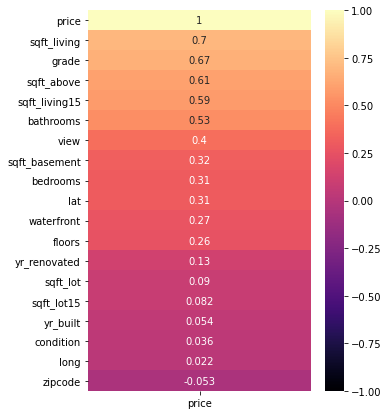

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (5,7)
sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False),vmin = -1, vmax = 1, annot=True, cmap="magma");

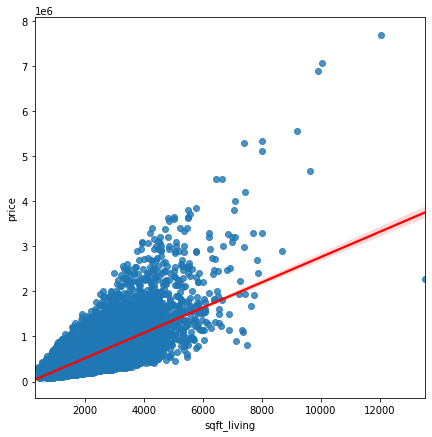

In [5]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (7,7)
sns.regplot(df['sqft_living'],df['price'],line_kws={'color': 'red'});

# 2) 

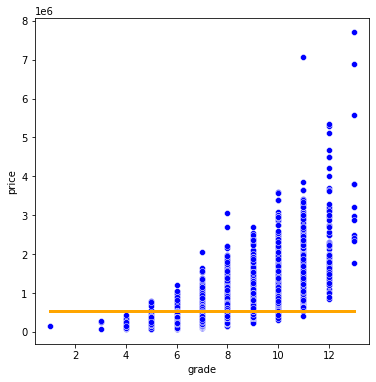

In [6]:
# 평균기준모델
pred = df['price'].mean()

# 잔차 (예측값 - 관측값)
err = pred - df['price'] 

# MAE = 잔차의 절대값의 평균
MAE = err.abs().mean()

# 기준모델 시각화
X = df['grade'] # 특성행렬
y = df['price'] # 타겟벡터

plt.rcParams["figure.figsize"] = (6,6)
sns.lineplot(x=X, y=pred, color ='Orange', linewidth = 3)
sns.scatterplot(x=X,y=y, color = 'Blue');
plt.show();

In [7]:
print(f'평균가격은 "{pred:,.0f}달러"입니다.')

평균가격은 "540,088달러"입니다.


# 3) 

In [8]:
from sklearn.linear_model import LinearRegression

# 모델 할당 
model = LinearRegression()

# 특성행렬 & 타겟벡터
feature = ['grade']
t_vector = ['price']
X_train = df[feature]
y_train = df[t_vector]

# 할당된 모델에 학습
model.fit(X_train, y_train)

# grade가 6인 경우
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'6등급 주택가격은 {y_pred[0][0]:,.0f}달러 입니다.')

6등급 주택가격은 194,700달러 입니다.


# 4) 

In [9]:
coeff,intercept = model.coef_[0][0], model.intercept_[0]
print(f'계수는 {coeff:,.1f}이고, 절편은 {intercept:,.1f}이다.')

계수는 208,457.6이고, 절편은 -1,056,045.0이다.


In [10]:
# grade 범위 확인 (1sqft ~ 13sqft)

g_range = df['grade'].min(),df['grade'].max()
g_range

(1, 13)

In [11]:
# 새로운 데이터 예측
def grade_prediction(g):
  y_pred = model.predict([[g]])
  result = f'{int(g)}등급 주택 금액은 {int(y_pred[0][0]):,.0f}달러 입니다. \n1등급 상승 할때 마다 {coeff:,.0f}달러가 상승합니다.'
  return result

print(grade_prediction(14))

14등급 주택 금액은 1,862,360달러 입니다. 
1등급 상승 할때 마다 208,458달러가 상승합니다.


In [12]:
# 최소제곱법 (Ordinary Least Squares)
# y = w*a + b

x = df['grade']
y = df['price']

x_bar = df['grade'].mean()
y_bar = df['price'].mean()

# w 
w  = ((x-x_bar)*(y-y_bar)).sum() / ((x-x_bar)**2).sum()
print(f'{w:,.0f}')

# b
b = y_bar - w*x_bar
print(f'{b:,.0f}')

208,458
-1,056,045


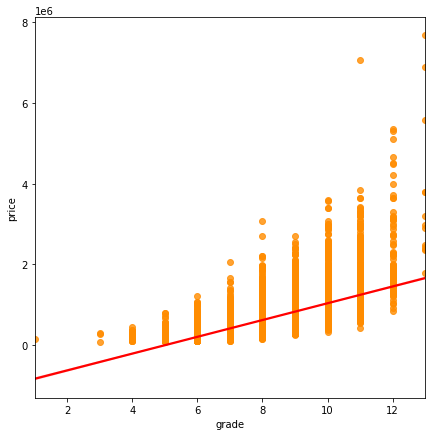

In [13]:
plt.rcParams["figure.figsize"] = (7,7)
sns.regplot(x=x,y=y, color= 'darkorange',line_kws={'color': 'red'});

# 5) 

In [14]:
# sqft_living 범위 확인 (290sqft ~ 13540sqft)
print(df['sqft_living'].min(),df['sqft_living'].max(), sep="\n")

290
13540


In [15]:
model2 = LinearRegression()

feature2 = ['sqft_living']
t_vector = ['price']

X2_train = df[feature2] 
y2_train = df[t_vector] 

model2.fit(X2_train,y2_train)

X2_test = [[15000]]
y2_pred = model2.predict(X2_test)

print(f'{X2_test[0][0]}sqft 주택의 가격은 {y2_pred[0][0]:,.0f}달러 입니다.')

15000sqft 주택의 가격은 4,165,773달러 입니다.


In [16]:
coeff2,intercept2 = model2.coef_[0][0], model2.intercept_[0]
print(f'계수는 {coeff2:,.1f}이고, 절편은 {intercept2:,.1f}이다.')

계수는 280.6이고, 절편은 -43,580.7이다.


In [17]:
def sqft_prediction(sqft):
  y2_pred = model2.predict([[sqft]])
  result2 = f'{int(sqft)}sqrt 주택 금액은 {int(y2_pred[0][0]):,.1f}달러 입니다. \n\
  1sqpt 상승 할때 마다 {coeff2:,.1f}달러가 상승합니다.'
  return result2

print(sqft_prediction(15000))  

15000sqrt 주택 금액은 4,165,772.0달러 입니다. 
  1sqpt 상승 할때 마다 280.6달러가 상승합니다.


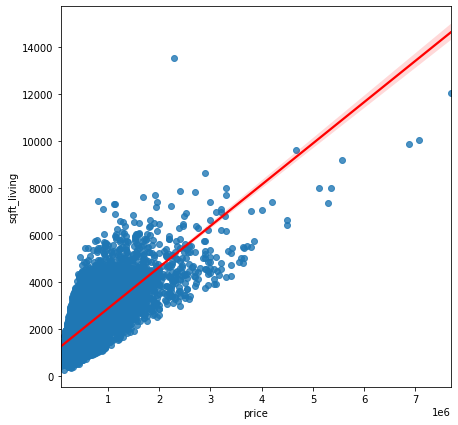

In [18]:
sns.regplot(x = df['price'],y = df['sqft_living'],line_kws={'color': 'red'});

**`두 모델 비교`**

grade 모델과 sqrt 모델의 평균절대오차값을 비교해보니,

grade가 sqrt보다 아주 작은 차이로 큰 값임을 볼수 있습니다.

따라서 두 모델만 두고 봤을 때는 sqrt모델이 grade모델 보다 오차가 약간 작음으로,

조금 더 괜찮은 모델이라고 할 수 있다

In [19]:
# Grade
from sklearn.metrics import mean_absolute_error
G_MAE = mean_absolute_error(X_train, y_train)
print(f'{G_MAE:,.0f}')

540,080


In [20]:
# SQRT
S_MAE = mean_absolute_error(X2_train, y2_train)
print(f'{S_MAE:,.0f}')

538,008


In [21]:
# grade모델

# 잔차를 제곱하여 전체를 합함
# SSE = ((y_train-y_pred)**2).sum()
# 실제 값들이 평균으로 부터 흩어진 정도
# SST = ((y_train -y_train.mean())**2).sum()

# R_squared = 1- (SSE/SST)
# R_squared

In [22]:
# sqrt 모델

# SSE2 = ((y2_train-y2_pred)**2).sum()
# SST2 = ((y2_train -y2_train.mean())**2).sum()
# R2_squared = 1 - (SSE2/SST2)
# R2_squared

# 6)

```
좋은 모델을 만들기 위해서는 "Feature Selection" 과정을 거쳐야한다.

우선, 각종 도메인 지식이 풍부하다면 이를 활용하여, 데이터셋에서 중요한 feature를 선택, 또는 새로운 feature를 생성한다.

만일, 도메인 지식이 부족할 경우엔 "Filter Method","Wrapper Method","Embedded method"를 사용할 수 있다.

1. "Filter Method"
먼저 "Filter Method"의 경우, 통계적 측정 방법을 사용하여 feature간의 상관관계를 알아낸 후, feature를 선택하는 방법이다. 

하지만 상관계수가 높다고 하더라도 모델에는 적합하지 않을수도 있기 때문에 아주 적합한 방법이라고 하기는 어렵다.

2."Wrapper Method"
다음으로 "Wrapper Method"이다. 이 방법은 예측 정확도 측면에서 가장 좋은 성능을 보이는 "feature의 집단"을 선택하는 방법이다. 

여러번 모델을 돌려서 시간과 비용이 매우 높게 발생 되지만, 결과적으로는 가장 좋은 "feature의 집단"을 선택하기 때문에 성능면에서는 바람직한 방법이다.

3."Embedded method"
마지막 방법으로는, "Embedded method"가 있다. 이 방법은 Filtering과 Wrapper의 장점을 결함한 방법으로,각각의 Feature를 직접 학습하며, 

모델의 정확도에 기여하는 Feature를 선택한다. 계수가 0이 아닌 Feature가 선택되고, 쾌적하게 모델을 훈련하기 때문에 학습 절차를 최적화 시킨다.

```



# 7) 

```
OLS(Ordinary Least Sqaures)는 한국어로 "최소제곱법"이라고 불린다.

주어진 데이터의 신뢰도가 떨어져서, 정확한 값을 측정하기 보다는 그 경향이나 규칙 혹은 일반적인 형태를 유도할 때 사용된다. 

수학적 의미로는, 모든 잔차의 제곱의 합이 최소가 될 때의 정규방정식을 구하는 과정이다. 

잔차는 예측값과 관측값의 차이라고 정의한다. 잔차의 제곱의 합은 RSS(SSE)라고 불리며, RSS를 최소화하는 과정을 통해 정확도를 향상 시킬수 있다.
```



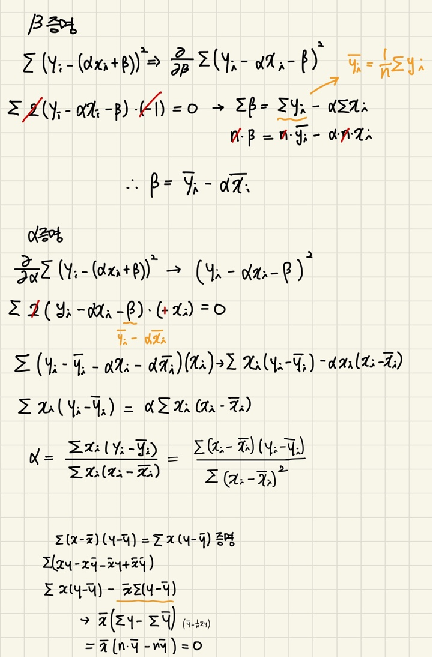